In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import geopandas
from geodatasets import get_path

from dwca.read import DwCAReader
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Transformer
import cartopy.crs as ccrs
import shapely.geometry

# Wolf data set

In [3]:
useful_columns = ["id", "eventDate", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", 
                  "scientificName", "level0Gid", "level0Name", "level1Gid", "level1Name", "level2Gid", "level2Name", 
                  "level3Gid", "level3Name", "geodeticDatum"]

In [4]:
with DwCAReader("./dataset_species/wolf.zip") as dwca:
    df = dwca.pd_read('occurrence.txt', parse_dates=True)
    df = df[useful_columns]
    assert (df["geodeticDatum"][0] == df["geodeticDatum"]).all(), "Ovservations do not share coordinate reference system!"
    gdf = geopandas.GeoDataFrame(df, 
                                 geometry=geopandas.points_from_xy(df["decimalLongitude"], df["decimalLatitude"]), 
                                 crs=df["geodeticDatum"][0])

In [12]:
gdf

,id,eventDate,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,scientificName,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,geodeticDatum,geometry
0,932753580,2014-01-14T00:00:00,52.475517,9.266085,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.9_1,Niedersachsen,DEU.9.34_1,Region Hannover,DEU.9.34.12_1,Neustadt am Rübenberge,WGS84,POINT (9.26609 52.47552)
1,920988729,2012-07-27T00:00:00,53.016674,10.084191,250.0,"Canis lupus Linnaeus, 1758",DEU,Germany,DEU.9_1,Niedersachsen,DEU.9.18_1,Heidekreis,DEU.9.18.5_1,Munster,WGS84,POINT (10.08419 53.01667)
2,920986504,2010-02-18T00:00:00,53.633545,10.876122,250.0,"Canis lupus Linnaeus, 1758",DEU,Germany,DEU.15_1,Schleswig-Holstein,DEU.15.3_1,Herzogtum Lauenburg,DEU.15.3.7_1,Lauenburgische Seen,WGS84,POINT (10.87612 53.63354)
3,920982536,2013-12-08T00:00:00,52.537945,10.151367,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.9_1,Niedersachsen,DEU.9.4_1,Celle,DEU.9.4.10_1,Wathlingen,WGS84,POINT (10.15137 52.53795)
4,920969317,2012-08-17T00:00:00,51.279781,14.613338,250.0,"Canis lupus Linnaeus, 1758",DEU,Germany,DEU.14_1,Sachsen,DEU.14.1_1,Bautzen,DEU.14.1.26_1,Malschwitz,WGS84,POINT (14.61334 51.27978)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1338222257,2015-05-07T00:00:00,49.720039,8.967762,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.7_1,Hessen,DEU.7.17_1,Odenwaldkreis,DEU.7.17.5_1,Brombachtal,WGS84,POINT (8.96776 49.72004)
1557,1338221850,2015-07-11T00:00:00,52.128483,11.040916,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.13_1,Sachsen-Anhalt,DEU.13.3_1,Börde,DEU.13.3.7_1,Obere Aller,WGS84,POINT (11.04092 52.12848)
1558,1338218100,2015-02-18T00:00:00,50.704868,6.627252,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.10_1,Nordrhein-Westfalen,DEU.10.13_1,Euskirchen,DEU.10.13.11_1,Zülpich,WGS84,POINT (6.62725 50.70487)
1559,1338215924,2015-11-01T00:00:00,50.527344,8.855667,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.7_1,Hessen,DEU.7.6_1,Gießen,DEU.7.6.11_1,Lich,WGS84,POINT (8.85567 50.52734)


In [5]:
# remove outlier 
gdf = gdf[gdf.decimalLongitude > -20]

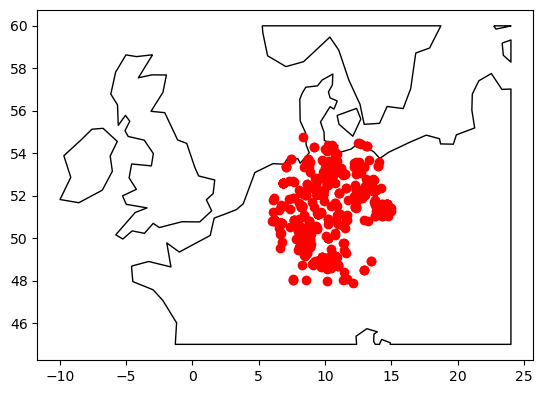

In [6]:
world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([-11, 45, 24, 60]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

plt.show()

<Axes: >

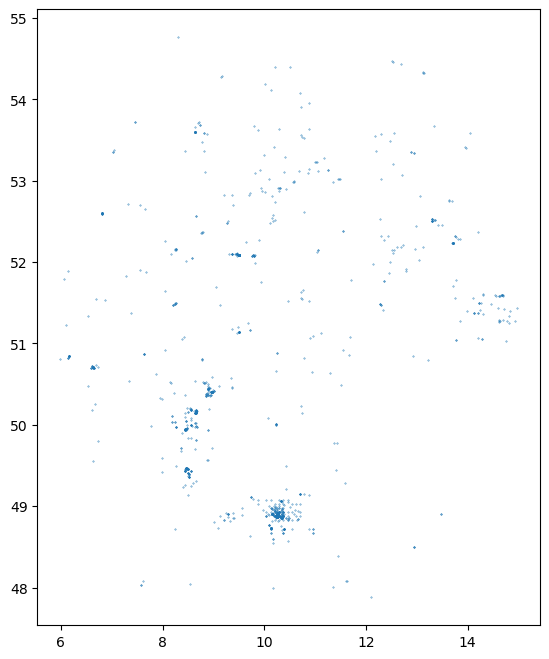

In [7]:
gdf.plot(markersize=.1, figsize=(8, 8))

In [65]:
# corresponding nc file
bio1=xr.open_dataset('/home/zhang/script/datasets/bio1.nc')

# Extract rotated pole coordinates 
minx=-9
miny=-3
maxx=0
maxy=5

lats_rot = bio1.sel(rlat=slice(miny,maxy), rlon=slice(minx,maxx))['rlat'].values
lons_rot = bio1.sel(rlat=slice(miny,maxy), rlon=slice(minx,maxx))['rlon'].values
# projection of the grid -- how to define this?
crs = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
# Transform rotated pole coordinates to regular latitudes and longitudes
transformer = Transformer.from_crs(crs, 'EPSG:4326', always_xy=True)

grid_cells = []
for i in range(len(lats_rot) - 1):
    for j in range(len(lons_rot) - 1):
        lat1_rot, lat2_rot = lats_rot[i], lats_rot[i + 1]
        lon1_rot, lon2_rot = lons_rot[j], lons_rot[j + 1]

        # Transform rotated pole coordinates to regular latitudes and longitudes
        
        lon1, lat1 = transformer.transform(lon1_rot, lat1_rot)
        lon2, lat2 = transformer.transform(lon2_rot, lat2_rot)

        # Create a polygon using the four corners of each grid cell
        polygon = shapely.geometry.Polygon([(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)])

        # Append the polygon to the GeoDataFrame along with the variable value
        grid_cells.append({'geometry': polygon})

cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs=crs)

In [45]:
print (cell.crs)

+proj=ob_tran +ellps=WGS84 +a=6378137.0 +o_proj=latlon +o_lon_p=0.0 +o_lat_p=39.25 +lon_0=18 +to_meter=111319.4907932736 +no_defs +type=crs


(5.5386326, 15.4141774, 47.535835500000005, 55.107454499999996)

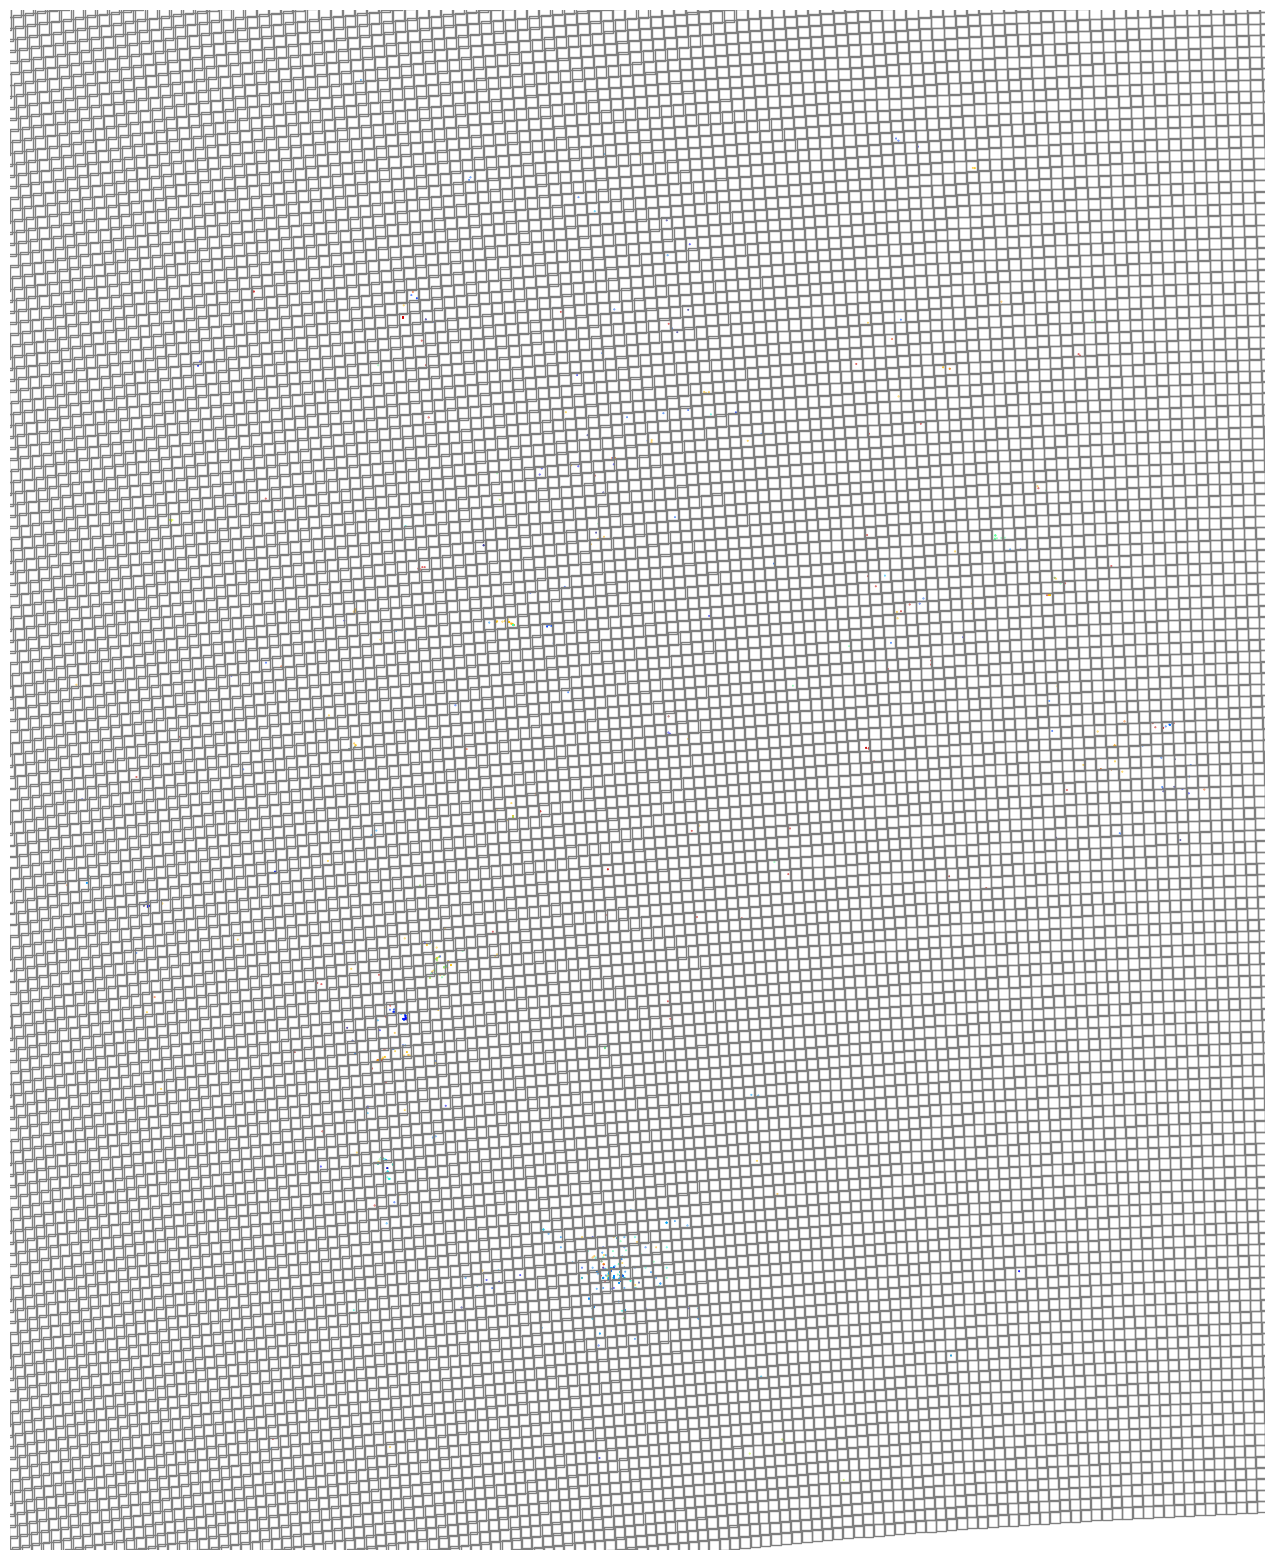

In [66]:
ax = gdf.plot(markersize=.1, figsize=(24, 20), column='id', cmap='jet')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [67]:
# geopandas sjoin and dissolve

merged = geopandas.sjoin(gdf, cell, how='left', op='within')
#merged = geopandas.sjoin(gdf.to_crs(cell.crs), cell, how='left', op='within') # issue of Porjection:
# UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.

/home/zhang/miniconda3/envs/gpd/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_121116/4255150630.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +proj=ob_tran +ellps=WGS84 +a=6378137.0 +o_proj=la ...

  merged = geopandas.sjoin(gdf, cell, how='left', op='within')


In [56]:
merged

,id,eventDate,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,scientificName,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,geodeticDatum,geometry,index_right
0,932753580,2014-01-14T00:00:00,52.475517,9.266085,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.9_1,Niedersachsen,DEU.9.34_1,Region Hannover,DEU.9.34.12_1,Neustadt am Rübenberge,WGS84,POINT (9.26609 52.47552),14899.0
1,920988729,2012-07-27T00:00:00,53.016674,10.084191,250.0,"Canis lupus Linnaeus, 1758",DEU,Germany,DEU.9_1,Niedersachsen,DEU.9.18_1,Heidekreis,DEU.9.18.5_1,Munster,WGS84,POINT (10.08419 53.01667),16376.0
2,920986504,2010-02-18T00:00:00,53.633545,10.876122,250.0,"Canis lupus Linnaeus, 1758",DEU,Germany,DEU.15_1,Schleswig-Holstein,DEU.15.3_1,Herzogtum Lauenburg,DEU.15.3.7_1,Lauenburgische Seen,WGS84,POINT (10.87612 53.63354),18016.0
3,920982536,2013-12-08T00:00:00,52.537945,10.151367,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.9_1,Niedersachsen,DEU.9.4_1,Celle,DEU.9.4.10_1,Wathlingen,WGS84,POINT (10.15137 52.53795),14909.0
4,920969317,2012-08-17T00:00:00,51.279781,14.613338,250.0,"Canis lupus Linnaeus, 1758",DEU,Germany,DEU.14_1,Sachsen,DEU.14.1_1,Bautzen,DEU.14.1.26_1,Malschwitz,WGS84,POINT (14.61334 51.27978),10719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1338222257,2015-05-07T00:00:00,49.720039,8.967762,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.7_1,Hessen,DEU.7.17_1,Odenwaldkreis,DEU.7.17.5_1,Brombachtal,WGS84,POINT (8.96776 49.72004),6903.0
1557,1338221850,2015-07-11T00:00:00,52.128483,11.040916,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.13_1,Sachsen-Anhalt,DEU.13.3_1,Börde,DEU.13.3.7_1,Obere Aller,WGS84,POINT (11.04092 52.12848),13614.0
1558,1338218100,2015-02-18T00:00:00,50.704868,6.627252,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.10_1,Nordrhein-Westfalen,DEU.10.13_1,Euskirchen,DEU.10.13.11_1,Zülpich,WGS84,POINT (6.62725 50.70487),NaN
1559,1338215924,2015-11-01T00:00:00,50.527344,8.855667,250.0,"Canis familiaris Linnaeus, 1758",DEU,Germany,DEU.7_1,Hessen,DEU.7.6_1,Gießen,DEU.7.6.11_1,Lich,WGS84,POINT (8.85567 50.52734),9185.0


In [68]:
# make a simple count variable that we can sum
merged['occurence']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'occurence'] = dissolve.occurence.values

In [51]:
cell

,geometry,occurence
0,"POLYGON ((4.78926 46.94948, 4.85425 46.94948, ...",NaN
1,"POLYGON ((4.86846 46.95919, 4.93357 46.95919, ...",NaN
2,"POLYGON ((4.94770 46.96883, 5.01291 46.96883, ...",NaN
3,"POLYGON ((5.02696 46.97842, 5.09228 46.97842, ...",NaN
4,"POLYGON ((5.10625 46.98796, 5.17168 46.98796, ...",NaN
...,...,...
23630,"POLYGON ((17.47458 55.67157, 17.57118 55.67157...",NaN
23631,"POLYGON ((17.57175 55.67192, 17.66848 55.67192...",NaN
23632,"POLYGON ((17.66892 55.67221, 17.76578 55.67221...",NaN
23633,"POLYGON ((17.76609 55.67242, 17.86309 55.67242...",NaN


/tmp/ipykernel_121116/2160863836.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


(5.5550017149894515, 15.421810802781998, 47.52044463247741, 55.15976349649285)

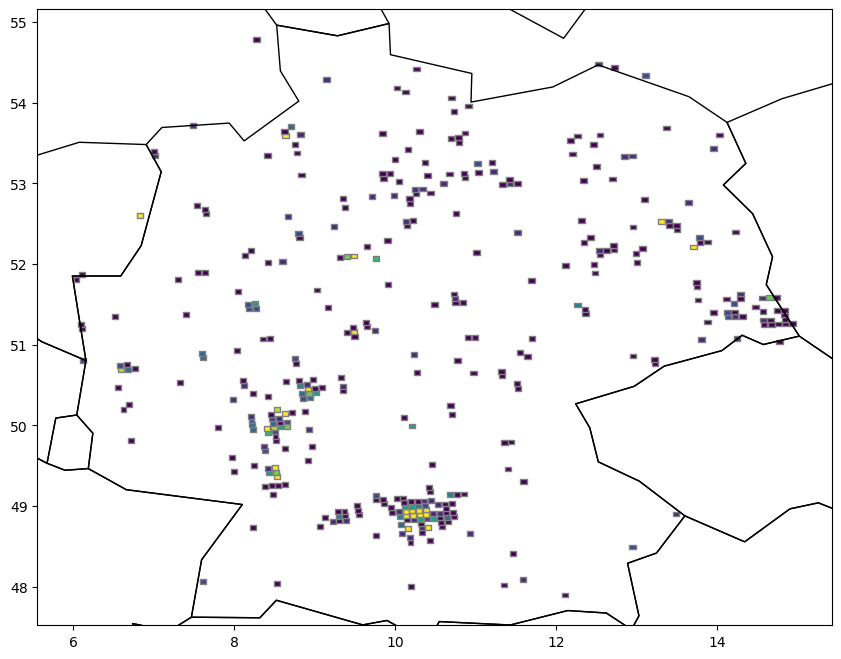

In [69]:
ax = cell.plot(column='occurence', figsize=(12, 8), cmap='viridis', vmax=10, edgecolor="grey")
plt.autoscale(False)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))  
#world.clip([5, 15, 47, 55]).to_crs(cell.crs).plot(ax=ax, color='none', edgecolor='black')
world.plot(ax=ax, color='none', edgecolor='black')
ax.axis('on')


In [62]:
cell

,geometry,occurence
0,"POLYGON ((4.78926 46.94948, 4.85425 46.94948, ...",NaN
1,"POLYGON ((4.86846 46.95919, 4.93357 46.95919, ...",NaN
2,"POLYGON ((4.94770 46.96883, 5.01291 46.96883, ...",NaN
3,"POLYGON ((5.02696 46.97842, 5.09228 46.97842, ...",NaN
4,"POLYGON ((5.10625 46.98796, 5.17168 46.98796, ...",NaN
...,...,...
23630,"POLYGON ((17.47458 55.67157, 17.57118 55.67157...",NaN
23631,"POLYGON ((17.57175 55.67192, 17.66848 55.67192...",NaN
23632,"POLYGON ((17.66892 55.67221, 17.76578 55.67221...",NaN
23633,"POLYGON ((17.76609 55.67242, 17.86309 55.67242...",NaN


In [95]:
cell

,geometry,occurence
0,"POLYGON ((4.78926 46.94948, 4.85425 46.94948, ...",NaN
1,"POLYGON ((4.86846 46.95919, 4.93357 46.95919, ...",NaN
2,"POLYGON ((4.94770 46.96883, 5.01291 46.96883, ...",NaN
3,"POLYGON ((5.02696 46.97842, 5.09228 46.97842, ...",NaN
4,"POLYGON ((5.10625 46.98796, 5.17168 46.98796, ...",NaN
...,...,...
23630,"POLYGON ((17.47458 55.67157, 17.57118 55.67157...",NaN
23631,"POLYGON ((17.57175 55.67192, 17.66848 55.67192...",NaN
23632,"POLYGON ((17.66892 55.67221, 17.76578 55.67221...",NaN
23633,"POLYGON ((17.76609 55.67242, 17.86309 55.67242...",NaN


<Axes: >

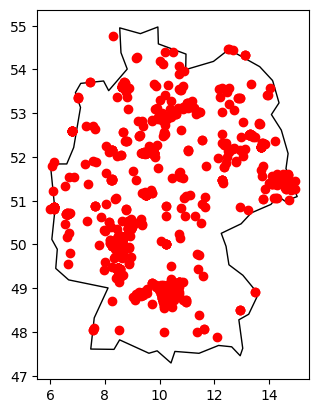

In [92]:
# We restrict to South America.
ax = world.loc[world['name'] == 'Germany'].plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")